In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_excel('/content/Supervisión de actos emitidos por las entidades del SNBE_0.xlsx')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Item                         212 non-null    int64         
 1   Tipo de informe              212 non-null    object        
 2   N° de Informe                212 non-null    object        
 3   Fecha de Emisión             212 non-null    datetime64[ns]
 4   Actividad                    212 non-null    object        
 5   Departamento                 212 non-null    object        
 6   Provincia                    212 non-null    object        
 7   Distrito                     212 non-null    object        
 8   Cantidad de predios          212 non-null    int64         
 9   CUS                          212 non-null    object        
 10  Área Supervisada (m2)        212 non-null    float64       
 11  Resultado de la Supervisión  212 non-null    

In [51]:
df.describe()

Item  Cantidad de predios  Área Supervisada (m2)
count  212.000000           212.000000           2.120000e+02
mean   106.500000             1.108491           4.238754e+04
std     61.343296             0.489243           2.795441e+05
min      1.000000             1.000000           2.873000e+01
25%     53.750000             1.000000           4.031225e+02
50%    106.500000             1.000000           1.655720e+03
75%    159.250000             1.000000           7.037707e+03
max    212.000000             6.000000           3.622500e+06

In [52]:
df['Año'] = pd.DatetimeIndex(df['Fecha de Emisión']).year
df.head()

Item  Tipo de informe            N° de Informe Fecha de Emisión  \
0     1  INFORME BRIGADA  00004-2020/SBN-DGPE-SDS       2020-01-17   
1     2  INFORME BRIGADA  00017-2020/SBN-DGPE-SDS       2020-01-27   
2     3  INFORME BRIGADA  00018-2020/SBN-DGPE-SDS       2020-01-27   
3     4  INFORME BRIGADA  00019-2020/SBN-DGPE-SDS       2020-01-27   
4     5  INFORME BRIGADA  00020-2020/SBN-DGPE-SDS       2020-01-27   

                                Actividad Departamento   Provincia  \
0    SUPERVISIÓN DE NATURALEZA PREVENTIVA         LIMA        LIMA   
1  SUPERVISIÓN DE ACTOS DE ADMINISTRACIÓN     AREQUIPA  CONDESUYOS   
2    SUPERVISIÓN DE NATURALEZA PREVENTIVA     AREQUIPA    LA UNION   
3     SUPERVISIÓN DE ACTOS DE DISPOSICIÓN          ICA         ICA   
4  SUPERVISIÓN DE ACTOS DE ADMINISTRACIÓN        TACNA       TACNA   

      Distrito  Cantidad de predios      CUS  Área Supervisada (m2)  \
0          ATE                    1    32106                1189.29   
1  CHUQUIBAMBA                    1     7294                2292.81   
2         ALCA                    1    96173                1428.36   
3          ICA                    1  SIN CUS               35377.00   
4        TACNA                    1    84367                 634.09   

                         Resultado de la Supervisión  \
0                       CUMPLIMIENTO DE LA FINALIDAD   
1  COMPETENCIA DE LA DIRECCIÓN GENERAL DE ABASTEC...   
2                     INCUMPLIMIENTO DE LA FINALIDAD   
3                     INCUMPLIMIENTO DE LA FINALIDAD   
4                     INCUMPLIMIENTO DE LA FINALIDAD   

                                 Entidad supervisada   Año  
0   ASOCIACION DE DISCAPACITADOS DE HUAYCAN ATE-ADHA  2020  
1                            MINISTERIO DE EDUCACION  2020  
2  GERENCIA REGIONAL DE SALUD DEL GOBIERNO REGION...  2020  
3                                    CONTUGAS S.A.C.  2020  
4  ASOCIACIÓN LABORAL Y REACREACIONAL DE DISCAPAC...  2020

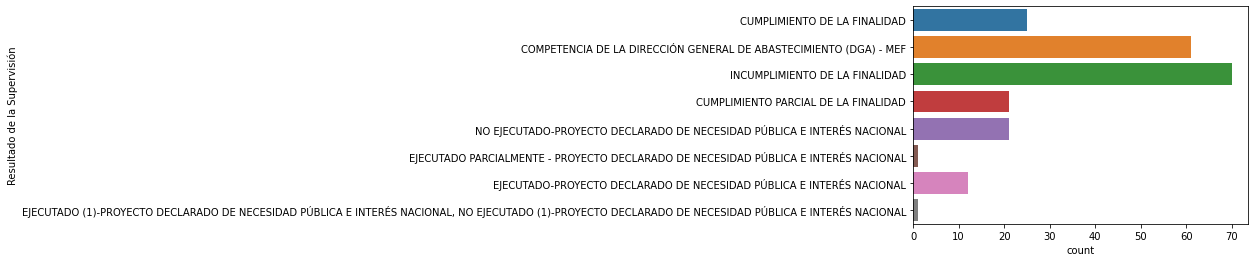

In [64]:
sns.countplot(y="Resultado de la Supervisión", data=df)

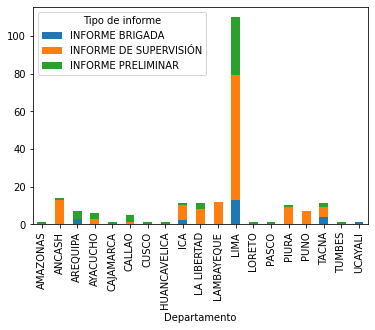

In [75]:
pd.crosstab(df['Departamento'],df['Tipo de informe']).plot(kind="bar",stacked=True)

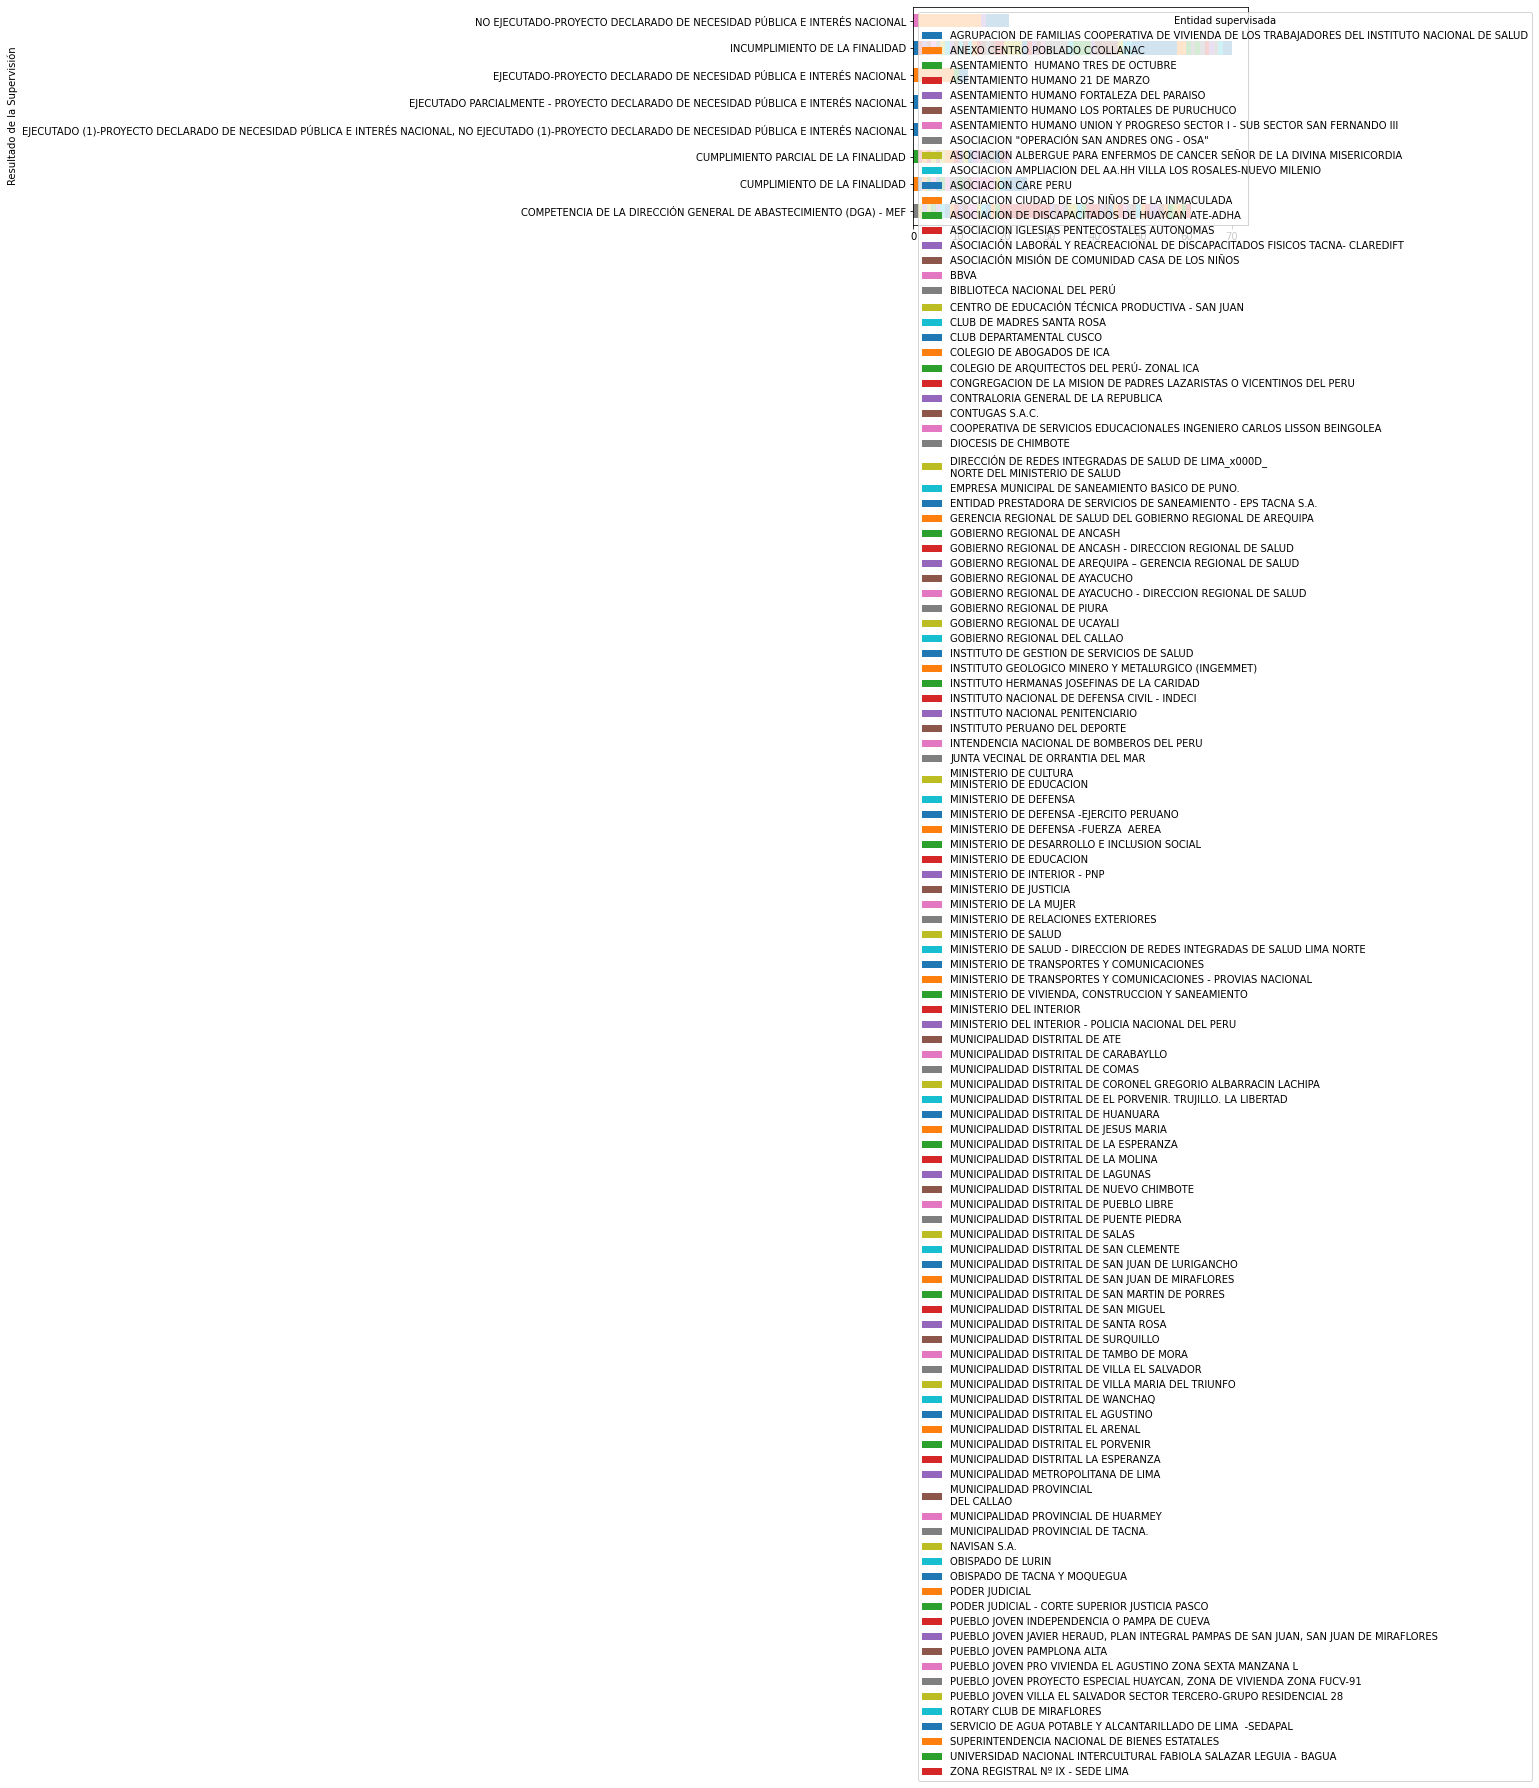

In [135]:
pd.crosstab(df['Resultado de la Supervisión'],df['Entidad supervisada']).plot(kind="barh",stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e18235510>],
      dtype=object)

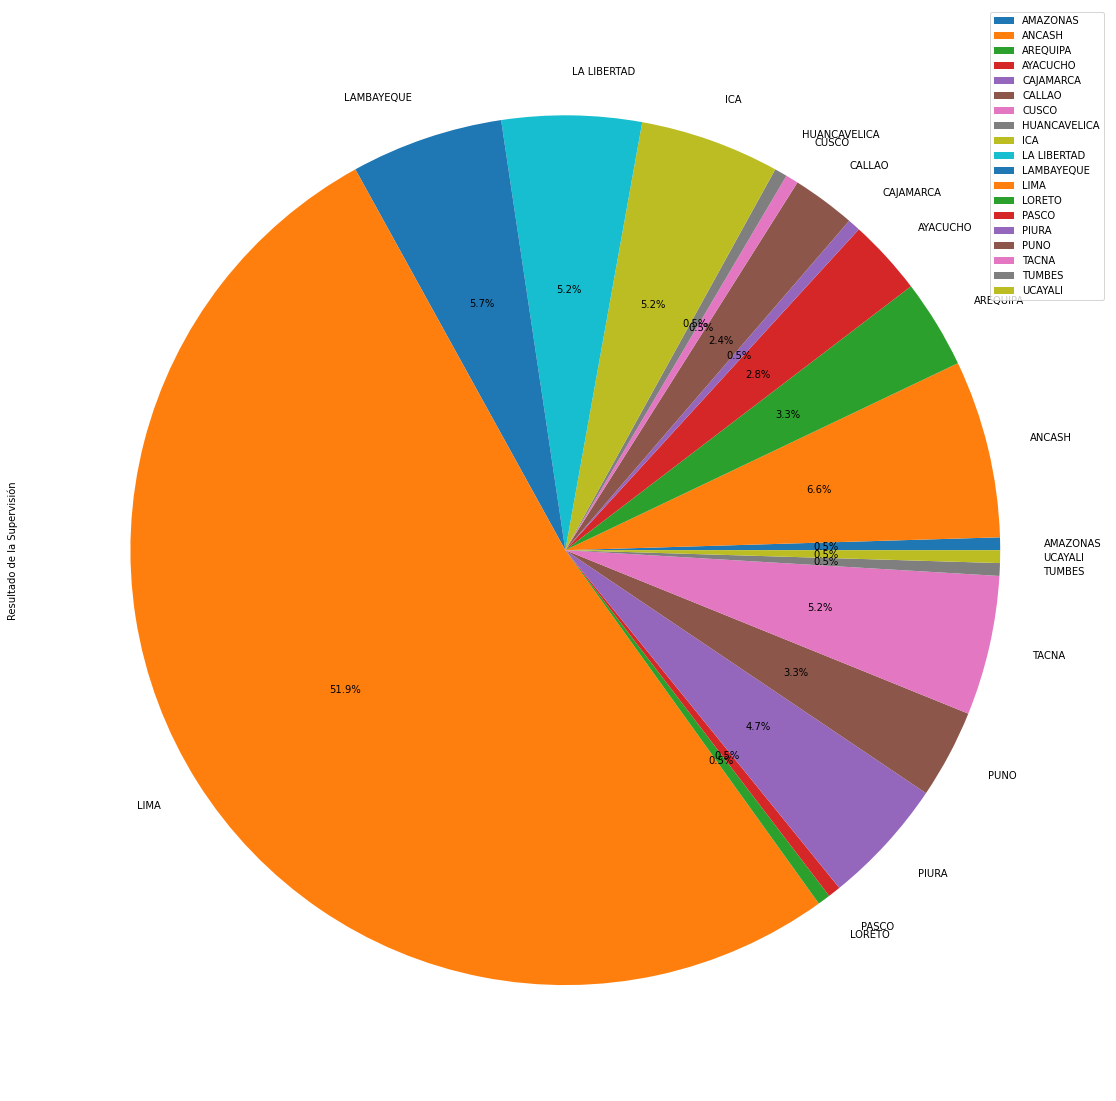

In [139]:
df2 = df.groupby(['Departamento'])[['Resultado de la Supervisión']].count()
df2.plot.pie(autopct="%.1f%%",subplots=True, figsize=[30,20])

In [140]:
df['Mes'] = pd.DatetimeIndex(df['Fecha de Emisión']).month
df['Trimestre'] = np.where(df['Mes']<3,'Trim 1',np.where(df['Mes']<6,'Trim 2',np.where(df['Mes']<9,'Trim 3','Trim 4')))


In [130]:
df2020 = df[(df["Año"]==2020)]
df2021 = df[(df["Año"]==2021)]

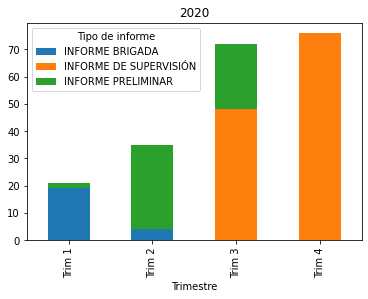

In [134]:
pd.crosstab(df2020['Trimestre'],df['Tipo de informe']).plot(kind="bar",stacked=True,title="2020")

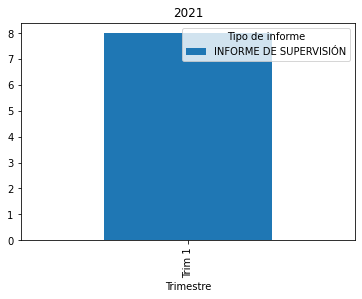

In [133]:
pd.crosstab(df2021['Trimestre'],df['Tipo de informe']).plot(kind="bar",stacked=True, title="2021")